In [2]:
#21 Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy
from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)

bagging_model.fit(X_train, y_train)
y_pred = bagging_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 1.00


In [3]:
#22 Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE)
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset (California Housing as a substitute for Boston)
data = fetch_california_housing()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Bagging Regressor using Decision Trees
bagging_model = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=50,
    random_state=42
)

# Train the model
bagging_model.fit(X_train, y_train)

# Predict on the test set
y_pred = bagging_model.predict(X_test)

# Evaluate using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 0.26


In [4]:
#23 Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get and print feature importance scores
importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)


                    Feature  Importance
7       mean concave points    0.141934
27     worst concave points    0.127136
23               worst area    0.118217
6            mean concavity    0.080557
20             worst radius    0.077975
22          worst perimeter    0.074292
2            mean perimeter    0.060092
3                 mean area    0.053810
26          worst concavity    0.041080
0               mean radius    0.032312
13               area error    0.029538
21            worst texture    0.018786
25        worst compactness    0.017539
10             radius error    0.016435
28           worst symmetry    0.012929
12          perimeter error    0.011770
24         worst smoothness    0.011769
1              mean texture    0.011064
5          mean compactness    0.009216
19  fractal dimension error    0.007135
29  worst fractal dimension    0.006924
4           mean smoothness    0.006223
14         smoothness error    0.005881
16          concavity error    0.005816


In [16]:
#24 Train a Random Forest Regressor and compare its performance with a single Decision Tree
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a single Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Calculate Mean Squared Errors
dt_mse = mean_squared_error(y_test, dt_preds)
rf_mse = mean_squared_error(y_test, rf_preds)

# Print results
print(f"Decision Tree Regressor MSE: {dt_mse:.2f}")
print(f"Random Forest Regressor MSE: {rf_mse:.2f}")


Decision Tree Regressor MSE: 0.53
Random Forest Regressor MSE: 0.26


In [17]:
#25 Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into training and testing sets (optional for OOB score, but useful for comparison)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier with OOB enabled
rf_model = RandomForestClassifier(
    n_estimators=100,
    oob_score=True,
    bootstrap=True,
    random_state=42
)

# Fit the model on training data
rf_model.fit(X_train, y_train)

# Print the OOB score
print(f"OOB Score: {rf_model.oob_score_:.2f}")


OOB Score: 0.95


In [18]:
#26  Train a Bagging Classifier using SVM as a base estimator and print accuracy
from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Bagging Classifier using SVM as the base estimator
model = BaggingClassifier(
    estimator=SVC(),
    n_estimators=10,
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 1.00


In [19]:
#27 Train a Random Forest Classifier with different numbers of trees and compare accuracy
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Test different numbers of trees
tree_counts = [1, 10, 50, 100, 200]
print("n_estimators\tAccuracy")
for n in tree_counts:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{n}\t\t{acc:.4f}")


n_estimators	Accuracy
1		0.9474
10		0.9649
50		0.9708
100		0.9708
200		0.9708


In [20]:
#28 2 Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create Bagging Classifier using Logistic Regression as base estimator
model = BaggingClassifier(
    estimator=LogisticRegression(max_iter=1000),
    n_estimators=10,
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Predict probabilities for AUC
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate AUC score
auc = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

AUC Score: 0.9978


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [21]:
#29 Train a Random Forest Regressor and analyze feature importance scores
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target
feature_names = data.feature_names

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance scores
importances = rf.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)


      Feature  Importance
0      MedInc    0.526011
5    AveOccup    0.138220
7   Longitude    0.086124
6    Latitude    0.086086
1    HouseAge    0.054654
2    AveRooms    0.047188
4  Population    0.031722
3   AveBedrms    0.029995


In [23]:
#30
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Bagging Classifier with Decision Trees (use estimator instead of base_estimator)
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)
bagging_model.fit(X_train, y_train)
bagging_pred = bagging_model.predict(X_test)
bagging_acc = accuracy_score(y_test, bagging_pred)

# Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

# Print results
print(f"Bagging Classifier Accuracy: {bagging_acc:.4f}")
print(f"Random Forest Classifier Accuracy: {rf_acc:.4f}")


Bagging Classifier Accuracy: 0.9591
Random Forest Classifier Accuracy: 0.9708


In [25]:
#31
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=10,          # number of parameter settings that are sampled
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    random_state=42
)

random_search.fit(X_train, y_train)

print("Best Hyperparameters:", random_search.best_params_)
print(f"Test Accuracy with Best Model: {accuracy_score(y_test, random_search.best_estimator_.predict(X_test)):.4f}")


Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 10}
Test Accuracy with Best Model: 0.9649


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

In [27]:
#32 Train a Bagging Regressor with different numbers of base estimators and compare performance
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Different numbers of base estimators to test
n_estimators_list = [1, 10, 50, 100, 200]

print("n_estimators\tMSE")
for n in n_estimators_list:
    model = BaggingRegressor(
        estimator=DecisionTreeRegressor(),  # Use 'estimator' here
        n_estimators=n,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{n}\t\t{mse:.4f}")


n_estimators	MSE
1		0.5583
10		0.2862
50		0.2579
100		0.2568
200		0.2542


In [28]:
#33 Train a Random Forest Classifier and analyze misclassified samples
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Find misclassified samples
misclassified_indices = [i for i, (true, pred) in enumerate(zip(y_test, y_pred)) if true != pred]

# Create DataFrame of misclassified samples with true and predicted labels
misclassified_samples = pd.DataFrame(X_test[misclassified_indices], columns=feature_names)
misclassified_samples['True_Label'] = y_test[misclassified_indices]
misclassified_samples['Predicted_Label'] = y_pred[misclassified_indices]

print(f"\nNumber of misclassified samples: {len(misclassified_indices)}")
print(misclassified_samples)


Test Accuracy: 0.9708

Number of misclassified samples: 5
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        13.34         15.86           86.49      520.0          0.10780   
1        13.80         15.79           90.43      584.1          0.10070   
2        13.96         17.05           91.43      602.4          0.10960   
3        14.48         21.46           94.25      648.2          0.09444   
4        15.13         29.81           96.71      719.5          0.08320   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.15350         0.11690              0.06987         0.1942   
1           0.12800         0.07789              0.05069         0.1662   
2           0.12790         0.09789              0.05246         0.1908   
3           0.09947         0.12040              0.04938         0.2075   
4           0.04605         0.04686              0.02739         0.1852   

   mean fractal dimension  ...  wo

In [39]:
#34 Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train single Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)

# Train Bagging Classifier with Decision Trees
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)
bagging_model.fit(X_train, y_train)
bagging_pred = bagging_model.predict(X_test)
bagging_acc = accuracy_score(y_test, bagging_pred)

print(f"Decision Tree Accuracy: {dt_acc:.4f}")
print(f"Bagging Classifier Accuracy: {bagging_acc:.4f}")


Decision Tree Accuracy: 0.9415
Bagging Classifier Accuracy: 0.9591


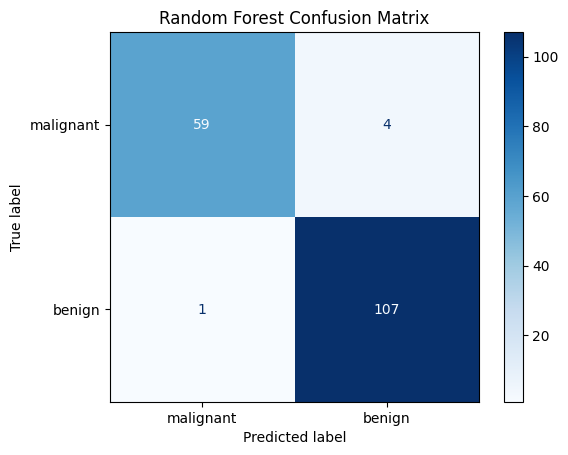

In [40]:
#35  Train a Random Forest Classifier and visualize the confusion matrix
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Random Forest Confusion Matrix")
plt.show()


In [41]:
#36 Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Base estimators
estimators = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, random_state=42))
]

# Stacking Classifier with Logistic Regression as final estimator
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=1000),
    cv=5
)

# Train stacking classifier
stacking_clf.fit(X_train, y_train)
stacking_pred = stacking_clf.predict(X_test)
stacking_acc = accuracy_score(y_test, stacking_pred)

# Train and evaluate individual models for comparison
results = {}
for name, model in estimators:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    results[name] = acc

# Print accuracies
print("Individual Model Accuracies:")
for name, acc in results.items():
    print(f"{name}: {acc:.4f}")
print(f"\nStacking Classifier Accuracy: {stacking_acc:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Individual Model Accuracies:
dt: 0.9415
svm: 0.9357
lr: 0.9708

Stacking Classifier Accuracy: 0.9708


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
#37 Train a Random Forest Classifier and print the top 5 most important features=
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame with feature names and their importance scores
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort features by importance descending and get top 5
top5 = feat_imp_df.sort_values(by='Importance', ascending=False).head(5)

print("Top 5 Important Features:")
print(top5)


Top 5 Important Features:
                 Feature  Importance
7    mean concave points    0.141934
27  worst concave points    0.127136
23            worst area    0.118217
6         mean concavity    0.080557
20          worst radius    0.077975


In [43]:
#38 Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Bagging Classifier
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)
bagging.fit(X_train, y_train)

# Predict on test set
y_pred = bagging.predict(X_test)

# Calculate precision, recall, and f1-score (binary classification)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")


Precision: 0.9633
Recall:    0.9722
F1-score:  0.9677


max_depth	Accuracy
1		0.9591
2		0.9532
3		0.9708
4		0.9708
5		0.9649
6		0.9649
7		0.9649
8		0.9708
9		0.9708
10		0.9708
11		0.9708
12		0.9708
13		0.9708
14		0.9708
15		0.9708
16		0.9708
17		0.9708
18		0.9708
19		0.9708
20		0.9708


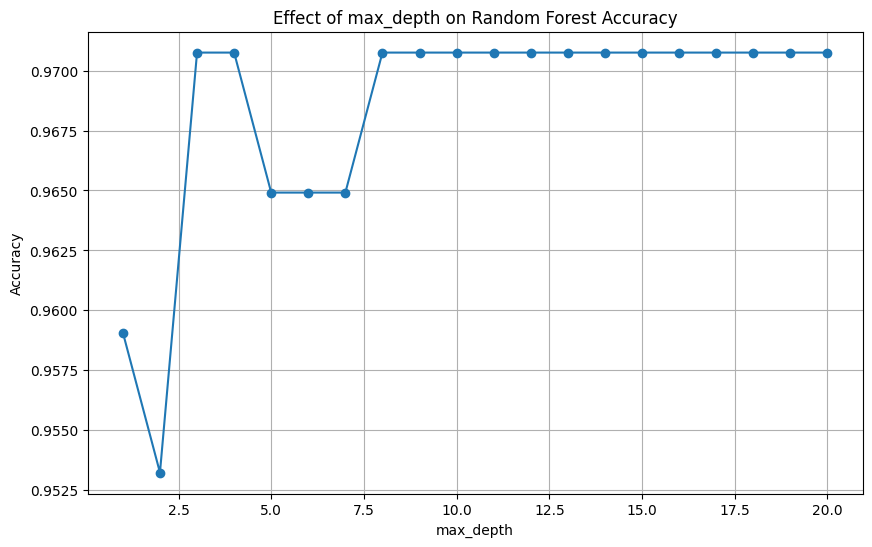

In [44]:
#39 Train a Random Forest Classifier and analyze the effect of max_depth on accuracy
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Range of max_depth values to test
max_depth_values = list(range(1, 21))  # from 1 to 20

accuracies = []

for depth in max_depth_values:
    rf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Print max_depth vs accuracy
print("max_depth\tAccuracy")
for depth, acc in zip(max_depth_values, accuracies):
    print(f"{depth}\t\t{acc:.4f}")

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(max_depth_values, accuracies, marker='o')
plt.title("Effect of max_depth on Random Forest Accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


In [47]:
#40  Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bagging_dt = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=50,
    random_state=42
)
bagging_dt.fit(X_train, y_train)
y_pred_dt = bagging_dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)

bagging_knn = BaggingRegressor(
    estimator=KNeighborsRegressor(),
    n_estimators=50,
    random_state=42
)
bagging_knn.fit(X_train, y_train)
y_pred_knn = bagging_knn.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)

print(f"MSE with Decision Tree base estimator: {mse_dt:.4f}")
print(f"MSE with K-Neighbors base estimator:    {mse_knn:.4f}")


MSE with Decision Tree base estimator: 0.2579
MSE with K-Neighbors base estimator:    1.1021


In [48]:
#41 Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_proba = rf.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_proba)

print(f"ROC-AUC Score: {roc_auc:.4f}")


ROC-AUC Score: 0.9968


In [49]:
#42  Train a Bagging Classifier and evaluate its performance using cross-validatio.
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

data = load_breast_cancer()
X, y = data.data, data.target

bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)

cv_scores = cross_val_score(bagging, X, y, cv=5, scoring='accuracy')

print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean():.4f}")
print(f"Standard deviation: {cv_scores.std():.4f}")


Cross-validation accuracy scores: [0.9122807  0.92105263 0.98245614 0.95614035 1.        ]
Mean accuracy: 0.9544
Standard deviation: 0.0339


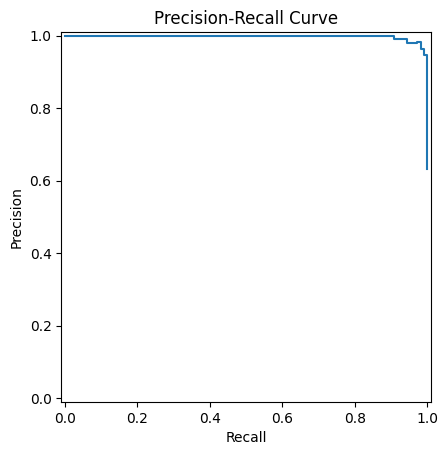

In [50]:
#43  Train a Random Forest Classifier and plot the Precision-Recall curv
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_scores = rf.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_scores)

disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title("Precision-Recall Curve")
plt.show()



In [51]:
#44  Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, random_state=42))
]

stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=1000, random_state=42)
)

rf = estimators[0][1]
lr = estimators[1][1]

rf.fit(X_train, y_train)
lr.fit(X_train, y_train)
stacking_clf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
lr_pred = lr.predict(X_test)
stack_pred = stacking_clf.predict(X_test)

print(f"Random Forest Accuracy:      {accuracy_score(y_test, rf_pred):.4f}")
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, lr_pred):.4f}")
print(f"Stacking Classifier Accuracy: {accuracy_score(y_test, stack_pred):.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Random Forest Accuracy:      0.9708
Logistic Regression Accuracy: 0.9708
Stacking Classifier Accuracy: 0.9708


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
#45 Train a Bagging Regressor with different levels of bootstrap samples and compare performance
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bootstrap_samples = [0.3, 0.5, 0.7, 1.0]

print("max_samples\tMSE")

for sample_frac in bootstrap_samples:
    model = BaggingRegressor(
        estimator=DecisionTreeRegressor(),
        n_estimators=50,
        max_samples=sample_frac,
        bootstrap=True,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{sample_frac}\t\t{mse:.4f}")


max_samples	MSE
0.3		0.2816
0.5		0.2633
0.7		0.2621
1.0		0.2579
